In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.spatial import Delaunay


from igraph import *
import matplotlib.pyplot as plt
import json
import numpy as np
import os
import random

In [46]:
edge_num = gcc.edge_disjoint_paths(2607, 1968)

InternalError: Error at /Users/travis/build/igraph/python-igraph/vendor/source/igraph/src/flow.c:511: Invalid source or target vertex, Invalid value

In [2]:
# Read graph data into dataframe, remove unnecessary columns, only keep december months
directory = os.path.abspath("/Users/bournsh/Desktop/UCLA_Studying/2020spring/ECE232/Project4/data/test_data")

graph_data = pd.read_csv(directory + '/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv')
graph_data = graph_data.drop(['standard_deviation_travel_time', 'geometric_mean_travel_time', 'geometric_standard_deviation_travel_time'], axis=1)
graph_data = graph_data.drop(graph_data[graph_data.month != 12].index)
dec_data = graph_data.drop(['month'], axis=1)




In [3]:
# Remove duplicates and keep the mean of duplicate travel times# Remove  
dec_array = np.asarray(dec_data) # idk numpy seems easier to work with
existing_paths = {}
existing_locations = np.unique(np.concatenate([dec_array[:,0],dec_array[:,1]]))
counter = 0
for row in dec_array:
    locations = tuple(np.sort(row[0:2]))
    if locations in existing_paths:
        existing_paths[locations].append(row[2])
        counter += 1
    else:
        existing_paths[locations] = [row[2]]

In [4]:
# Write out a csv file with december data, where duplicates are averaged
# This will be used in R's igraph library to do graph analysis
with open(directory + '/december_jennifer_data.txt','w') as f:
    for locations in existing_paths:
        string = '{} {} {:.2f}\n'.format(int(locations[0]),int(locations[1]),np.mean(existing_paths[locations]))
        f.write(string)

In [5]:
# Load in the location data
with open(directory + '/san_francisco_censustracts.json') as json_data:
    geo_data = json.load(json_data)
geo_data = geo_data['features']

In [6]:
# Process the raw data into a dictionary where key is location ID, value is display name and coordinate list
location_dictionary = {}

for entry in geo_data:
    data = {}
    # Retrieve coordinate list and compute mean coordinates
    coord_list = entry['geometry']['coordinates'][0][0]
    mean_coord = np.mean(np.asarray(coord_list),axis=0)
    movement_id = entry['properties']['MOVEMENT_ID']

    data['coord_list'] = coord_list
    data['mean_coord'] = mean_coord
    data['display_name'] = entry['properties']['DISPLAY_NAME']
    location_dictionary[movement_id] = data
    
    
    

In [7]:
# QUESTION 6: Report the number of nodes and edges in G.

uber_graph = Graph.Read(directory + '/december_jennifer_data.txt', format='ncol', directed=False)

gcc = uber_graph.components().giant()
summary(gcc)
summary(uber_graph)

print("We can see 7 nodes were removed")


# write graph to file
Graph.write_ncol(gcc, directory + '/uber_gcc.txt')

IGRAPH UNW- 1898 321703 -- 
+ attr: name (v), weight (e)
IGRAPH UNW- 1905 321713 -- 
+ attr: name (v), weight (e)
We can see 7 nodes were removed


In [8]:
# QUESTION 7: Build a minimum spanning tree (MST) of graph G. Report the street addresses
# of the two endpoints of a few edges. Are the results intuitive?

# edges in mst should be relatively shorter.

mst = gcc.spanning_tree(weights = gcc.es["weight"])
vertices = mst.vs()
summary(mst)

print('-'*50)

rand_n = []
for x in range(3):
    rand_n.append(random.randint(0,len(mst.es())-1))

count = 0
rand_e = []
for e in mst.es():
    st = e.tuple
    if count < 10:
        print(location_dictionary[vertices[st[0]]['name']]['display_name'],'---',location_dictionary[vertices[st[1]]['name']]['display_name'])
    
    if count in rand_n:
        rand_e.append(location_dictionary[vertices[st[0]]['name']]['display_name'])
        rand_e.append(location_dictionary[vertices[st[1]]['name']]['display_name'])
    count += 1
#     print(location_dictionary[str(st[0])]['display_name'], '---', location_dictionary[str(st[1])]['display_name'])

IGRAPH UNW- 1898 1897 -- 
+ attr: name (v), weight (e)
--------------------------------------------------
700 Lakeville Circle, Petaluma --- 7700 Lakeville Highway, Petaluma
200 Ely Road North, Petaluma --- 2600 Goodwin Avenue, Penngrove
Interstate 505, Vacaville --- Sikes Road, Dixon
3800 Mission Drive, Santa Cruz --- 1200 Rodriguez Street, Santa Cruz
19200 San Ramon Valley Boulevard, San Ramon --- 0 Mesa Vista Court, San Ramon
11600 Bruceville Road, Elk Grove --- 600 Vorden Road, Walnut Grove
2100 Canoas Garden Avenue, South San Jose, San Jose --- 2000 Little Orchard Street, South San Jose, San Jose
3500 Hicks Valley Road, Novato --- 0 Black Oak Lane, Novato
13700 Westboro Drive, Alum Rock, San Jose --- 500 Massar Avenue, East San Jose, San Jose
1000 Sterling Avenue, Berkeley Hills, Berkeley --- 1400 Queens Road, Berkeley Hills, Berkeley


In [9]:
# QUESTION 8: Determine what percentage of triangles in the graph (sets of 3 points on the
# map) satisfy the triangle inequality. You do not need to inspect all triangles, you can just estimate
# by random sampling of 1000 triangles.

def check_if_satisfy():
    current_set = ()
    indices = []
    weights = []
    
    for index in range(0,3): #generate 3 indices
        indices.append(random.randint(0,max_index))        
    current_set = tuple(sorted(indices))
    
    while(current_set in combined_set):
        for index in range(0,3): #generate 3 indices
            indices.append(random.randint(0,max_index))        
        current_set = tuple(sorted(indices))
        
    for e in current_set:
        weights.append(gcc_es[e]["weight"])
    
    if weights[0] < weights[1] + weights[2] and weights[1] < weights[0] + weights[2] and weights[2] < weights[0] + weights[1]:
        return True, weights, current_set
    else:
        return False, weights, current_set

#asked to test whether triangle inequality stands for all triangle
# find to sample triangle not gauranteed uniform distribution

sample_triangles = 1000
max_index = len(gcc.vs()) - 1  # used for generating index
gcc_vertices = gcc.vs()
gcc_es = EdgeSeq(gcc)

combined_set = set()
satisfied = 0

count = 0
while count < sample_triangles:
    #randomly generated 1000 triangles
                       
    for i in range(0,3):
        satisfy, weights, current_set = check_if_satisfy()
        if satisfy:
            break
                       
    combined_set.add(current_set)
    
    print('='*50,'triangle',count+1)
   
    edges = []
    start_nodes = []
    end_nodes = []
    for e in current_set:
        edges.append(gcc_es[e])
        
        source_vertex = gcc.vs[gcc_es[e].source]
        target_vertex = gcc.vs[gcc_es[e].target]
        
        start_nodes.append(location_dictionary[source_vertex['name']]['display_name'])
        end_nodes.append(location_dictionary[target_vertex['name']]['display_name'])
    
    for i in range(0, 3):
        print('weight:', weights[i],'edge ' + str(i+1) + ':', start_nodes[i], '---', end_nodes[i])
    
    if satisfy:
        satisfied += 1
        print('traingle satisfied')
    else:
        print('triangle not satisfied')
        
    count += 1  
    
print('percent:', str(satisfied / sample_triangles))

================================================== triangle 1
weight: 1335.98 edge 1: 4300 La Torre Avenue, South San Jose, San Jose --- 15200 Watsonville Road, Morgan Hill
weight: 1521.56 edge 2: 600 Manzanita Avenue, Corte Madera --- 900 Wood Lane, Petaluma
weight: 2137.8 edge 3: 2900 Broderick Street, Cow Hollow, San Francisco --- 600 East 8th Street, Downtown Oakland, Oakland
traingle satisfied
================================================== triangle 2
weight: 959.75 edge 1: 1000 Norwich Place, Ygnacio Valley, Walnut Creek --- 1700 Felicia Lane, Concord
weight: 969.95 edge 2: 1100 Danbury Drive, Alderbrook, San Jose --- 1100 White Drive, Santa Clara
weight: 1610.23 edge 3: 600 Sutter Street, Lower Nob Hill, San Francisco --- 3300 Davis Street, Peralta Hacienda, Oakland
traingle satisfied
================================================== triangle 3
weight: 1806.01 edge 1: 1700 Eastshore Boulevard, El Cerrito --- 3400 Noyo Street, Woodminster, Oakland
weight: 1094.26 edge 2: 2800

weight: 2300.58 edge 3: 1800 Scott Street, Western Addition, San Francisco --- Wilder Road, Wilder, Orinda
traingle satisfied
================================================== triangle 88
weight: 2001.01 edge 1: 400 Lincoln Avenue, Central San Jose, San Jose --- 30800 San Clemente Street, Hayward
weight: 2984.69 edge 2: 1100 Jamestown Drive, Sunnyvale West, Sunnyvale --- 700 Folsom Street, South of Market, San Francisco
weight: 1389.09 edge 3: 600 Panorama Drive, Midtown Terrace, San Francisco --- 1400 Jackson Street, Nob Hill, San Francisco
traingle satisfied
================================================== triangle 89
weight: 1743.07 edge 1: 1100 Vailwood Way, South San Mateo, San Mateo --- 900 B Street, Hayward
weight: 2069.74 edge 2: 4200 Shelter Creek Lane, San Bruno --- 100 Magnolia Street, Marina District, San Francisco
weight: 449.61 edge 3: 400 North Mary Avenue, Sunnyvale West, Sunnyvale --- Tasman Drive, Santa Clara
traingle satisfied
=====================================

weight: 2153.55 edge 3: 600 San Bruno Avenue East, San Bruno --- 500 Weldon Avenue, Grand Lake, Oakland
traingle satisfied
================================================== triangle 156
weight: 2316.13 edge 1: 800 Paloma Avenue, Burlingame Terrace, Burlingame --- 21800 Lomita Avenue, Cupertino
weight: 3098.84 edge 2: 3000 Telegraph Avenue, Pill Hill, Oakland --- Tasman Drive, Santa Clara
weight: 1028.03 edge 3: Building F, Buckingham Way, Lakeshore, San Francisco --- 1300 Wright Loop, Presidio, San Francisco
traingle satisfied
================================================== triangle 157
weight: 2174.52 edge 1: 6200 Smith Avenue, Newark --- Pier 2, Emeryville
weight: 2756.91 edge 2: 200 San Fernando Way, St. Francis, Daly City --- 2500 Lucas Valley Road, San Rafael
weight: 3379.16 edge 3: 500 Chester Street, West Oakland, Oakland --- 400 Santa Alicia Drive, Rohnert Park
traingle satisfied
================================================== triangle 158
weight: 1006.64 edge 1: 500 El 

weight: 1357.86 edge 1: 500 Carmel Circle, Baywood - Aragon, San Mateo --- 100 Nevada Street, Mount Carmel, Redwood City
weight: 850.07 edge 2: 4300 Alder Avenue, Centerville, Fremont --- 1100 Stevenson Boulevard, Central District, Fremont
weight: 2040.94 edge 3: 15900 Via Paro, San Lorenzo --- 1500 De Leon Way, Livermore
traingle satisfied
================================================== triangle 202
weight: 711.22 edge 1: 800 Hanover Avenue, Sunnyvale West, Sunnyvale --- 500 Castro Street, Old Mountain View, Mountain View
weight: 1732.91 edge 2: 100 Nancy Court, Old Mountain View, Mountain View --- 1100 Saint Francis Street, Palm Park, Redwood City
weight: 1814.38 edge 3: 500 University Avenue, Los Gatos --- 35500 Ebro Court, Centerville, Fremont
traingle satisfied
================================================== triangle 203
weight: 1732.91 edge 1: 100 Nancy Court, Old Mountain View, Mountain View --- 1100 Saint Francis Street, Palm Park, Redwood City
weight: 694.73 edge 2: 200 

weight: 2241.81 edge 2: 800 Easton Avenue, San Bruno --- 1500 Dominion Avenue, Sunnyvale
weight: 3641.58 edge 3: 200 Riverview Drive, Vallejo --- 9500 River Rose Way, Premier Garden, Sacramento
traingle satisfied
================================================== triangle 270
weight: 1600.53 edge 1: 1900 Sandcreek Way, Alameda --- 14900 Western Avenue, Lower Bal, San Leandro
weight: 2664.3 edge 2: 200 Naglee Avenue, Outer Mission, San Francisco --- 400 Giannini Drive, Santa Clara
weight: 2284.36 edge 3: 300 Church Street, Mission District, San Francisco --- Briones to Mount Diablo Regional Trail, Walnut Creek
traingle satisfied
================================================== triangle 271
weight: 2319.39 edge 1: 1000 2nd Street, Central Sacramento, Sacramento --- 4900 Couples Circle, Fairfield
weight: 797.96 edge 2: 0 Avoca Alley, West of Twin Peaks, San Francisco --- 2200 Rivera Street, Sunset District, San Francisco
weight: 1966.2 edge 3: 200 Ghormley Avenue, Brookfield Village, Oa

weight: 2479.03 edge 2: 700 Bay Road, Staumbaugh Heller, Redwood City --- 500 Hyde Street, Tenderloin, San Francisco
weight: 2277.51 edge 3: 26200 Catharine Court, Los Altos Hills --- 300 Wilde Avenue, Visitacion Valley, San Francisco
traingle satisfied
================================================== triangle 338
weight: 1560.1 edge 1: 3000 Berryessa Road, Alum Rock, San Jose --- 100 Arroyo Grande Way, Los Gatos
weight: 1770.04 edge 2: 25200 Belhaven Street, Southgate, Hayward --- Pier 2, Emeryville
weight: 1506.89 edge 3: 3300 Walton Way, West San Jose, San Jose --- 400 Piercy Road, Edenvale, San Jose
traingle satisfied
================================================== triangle 339
weight: 1814.38 edge 1: 500 University Avenue, Los Gatos --- 35500 Ebro Court, Centerville, Fremont
weight: 950.75 edge 2: 300 West Jack London Boulevard, Livermore --- 7400 Northland Avenue, San Ramon
weight: 2748.57 edge 3: 0 Berkeley Way, Diamond Heights, San Francisco --- 26200 Catharine Court, Los 

weight: 1853.56 edge 1: 0 Bernard Street, Nob Hill, San Francisco --- 100 Serramonte Boulevard, Serramonte, Daly City
weight: 1577.41 edge 2: 1400 40th Avenue, Sunset District, San Francisco --- 0 Brookdale Avenue, Visitacion Valley, San Francisco
weight: 894.98 edge 3: 0 Jolie Lane, Walnut Creek --- 4400 Prairie Willow Court, Concord
traingle satisfied
================================================== triangle 423
weight: 2446.88 edge 1: 800 Franklin Street, Fillmore District, San Francisco --- 300 Olive Avenue, Novato
weight: 1194.91 edge 2: 1800 Southgate Street, Southgate, Hayward --- 600 North Delaware Street, Central San Mateo, San Mateo
weight: 2033.44 edge 3: 0 Sable Pointe, Alameda --- J. Arthur Younger Freeway, Foster City
traingle satisfied
================================================== triangle 424
weight: 2191.84 edge 1: 200 Sandpiper Court, Foster City --- 43300 Jerome Avenue, Mission San Jose, Fremont
weight: 1601.61 edge 2: 3200 Suter Street, Upper Peralta Creek, O

weight: 1772.03 edge 3: 1400 Carmel Drive, Willow Glen, San Jose --- 400 Mariposa Avenue, Shoreline West, Mountain View
traingle satisfied
================================================== triangle 497
weight: 2005.59 edge 1: Maguire Peaks Loop Trail, Sunol --- 0 North 1st Street, Downtown, Campbell
weight: 905.38 edge 2: 4200 Shelter Creek Lane, San Bruno --- 500 John Muir Drive, Lakeshore, San Francisco
weight: 1518.3 edge 3: Wilder Road, Wilder, Orinda --- 1700 Felicia Lane, Concord
traingle satisfied
================================================== triangle 498
weight: 226.05 edge 1: 700 Lakeville Circle, Petaluma --- 7700 Lakeville Highway, Petaluma
weight: 984.66 edge 2: 3600 South Court, Fairmeadow, Palo Alto --- 1200 San Mateo Drive, Menlo Park
weight: 1281.13 edge 3: 400 Delta Street, Visitacion Valley, San Francisco --- 100 West Portal Avenue, West of Twin Peaks, San Francisco
triangle not satisfied
================================================== triangle 499
weight: 17

weight: 1423.98 edge 3: 3100 Garden Avenue, South San Jose, San Jose --- 1500 Sierra Road, North San Jose, San Jose
traingle satisfied
================================================== triangle 565
weight: 1537.82 edge 1: 6200 Smith Avenue, Newark --- 16300 Helo Drive, San Leandro
weight: 1533.26 edge 2: 900 B Street, Hayward --- 900 East 22nd Street, Clinton, Oakland
weight: 862.07 edge 3: 1400 Thomas Avenue, Bayview, San Francisco --- 700 Larch Avenue, Paradise Valley, South San Francisco
traingle satisfied
================================================== triangle 566
weight: 1738.41 edge 1: 16300 Helo Drive, San Leandro --- 800 West Tower Avenue, Alameda
weight: 1103.38 edge 2: 2200 Euclid Avenue, East Palo Alto --- 0 16th Avenue, Hayward Park, San Mateo
weight: 2013.69 edge 3: 1700 Doolittle Drive, Davis Tract, San Leandro --- 300 Marylinn Drive, Milpitas
traingle satisfied
================================================== triangle 567
weight: 811.17 edge 1: 4200 Middle Harbor 

================================================== triangle 633
weight: 1331.95 edge 1: 0 Rose Orchard Way, North San Jose, San Jose --- 800 Point Creek Drive, Alum Rock, San Jose
weight: 1920.25 edge 2: 900 Sutter Street, Lower Nob Hill, San Francisco --- 300 Heathcliff Drive, Westview, Pacifica
weight: 2498.53 edge 3: 800 Franklin Street, Fillmore District, San Francisco --- 400 Northumberland Avenue, Redwood Oaks, Redwood City
traingle satisfied
================================================== triangle 634
weight: 1079.18 edge 1: 200 Hyde Street, Tenderloin, San Francisco --- 1600 McKinnon Avenue, Bayview, San Francisco
weight: 1556.53 edge 2: 0 Mason Street, Tenderloin, San Francisco --- 1700 Chestnut Street, Northwest Berkeley, Berkeley
weight: 843.48 edge 3: 200 Jones Street, Tenderloin, San Francisco --- 300 Wilde Avenue, Visitacion Valley, San Francisco
traingle satisfied
================================================== triangle 635
weight: 1738.41 edge 1: 16300 Helo Drive,

weight: 615.69 edge 1: 300 Hale Street, Excelsior, San Francisco --- 600 28th Street, Noe Valley, San Francisco
weight: 962.0 edge 2: 200 Shorebird Circle, Redwood Shores, Redwood City --- 100 Yawl Court, Foster City
weight: 834.04 edge 3: 300 Grand Avenue, Adams Point, Oakland --- Upper Fire Trail, Berkeley
traingle satisfied
================================================== triangle 702
weight: 2084.87 edge 1: 22000 Cameron Street, Castro Valley --- 0 Stoneybrook Avenue, Excelsior, San Francisco
weight: 1842.64 edge 2: 35500 Ebro Court, Centerville, Fremont --- 1100 White Drive, Santa Clara
weight: 1770.74 edge 3: 3600 East 8th Street, South Kennedy Tract, Oakland --- 8100 Merion Drive, Newark
traingle satisfied
================================================== triangle 703
weight: 880.91 edge 1: 600 Hans Avenue, Cuesta Park, Mountain View --- 20000 Glasgow Drive, Saratoga
weight: 3301.76 edge 2: 700 Rhode Island Street, Potrero Hill, San Francisco --- 3400 Mauricia Avenue, Santa C

================================================== triangle 792
weight: 967.78 edge 1: 38100 Hastings Court, Centerville, Fremont --- 8100 Merion Drive, Newark
weight: 2506.62 edge 2: 1500 Adrian Road, Ingold - Milldale, Burlingame --- 600 Laura Drive, San Tomas, Campbell
weight: 2334.42 edge 3: 33900 Emilia Lane, Ardenwood, Fremont --- 2100 South 10th Street, South San Jose, San Jose
traingle satisfied
================================================== triangle 793
weight: 637.75 edge 1: 5000 Morocco Drive, Santa Rosa --- 5400 Alta Monte Drive, Santa Rosa
weight: 1732.24 edge 2: 1600 Parrott Drive, South San Mateo, San Mateo --- 7100 Rainbow Drive, West San Jose, San Jose
weight: 1230.78 edge 3: 7400 Northland Avenue, San Ramon --- 2000 San Miguel Drive, Walnut Creek
traingle satisfied
================================================== triangle 794
weight: 1853.26 edge 1: 700 Rhode Island Street, Potrero Hill, San Francisco --- Bayfront Expressway, Menlo Park
weight: 1397.68 edge 2: 2

weight: 2439.4 edge 1: 5300 Lawton Avenue, Shafter, Oakland --- 0 16th Avenue, Hayward Park, San Mateo
weight: 1802.94 edge 2: 4900 Hildasue Terrace, Ardenwood, Fremont --- 1500 East 31st Street, Tuxedo, Oakland
weight: 1258.14 edge 3: 5400 Ridgewood Drive, Ardenwood, Fremont --- 100 Greentree Way, Milpitas
traingle satisfied
================================================== triangle 861
weight: 1257.02 edge 1: 200 North 26th Street, Central San Jose, San Jose --- 400 Moffett Boulevard, Mountain View
weight: 1297.75 edge 2: Monte Bello Road (Trail), Cupertino --- 0 Crystal Springs Terrace, Hillsborough Park, Hillsborough
weight: 1329.61 edge 3: 200 2nd Street, Sunnyvale --- 41700 Covington Drive, Mission Valley, Fremont
traingle satisfied
================================================== triangle 862
weight: 1223.08 edge 1: 200 South 17th Street, Coronado, Richmond --- 300 Warwick Avenue, Adams Point, Oakland
weight: 1116.28 edge 2: 1400 Club View Terrace, Country Club, Los Altos ---

================================================== triangle 943
weight: 399.55 edge 1: 1000 El Centro Avenue, Napa --- 3100 Linda Vista Avenue, Napa
weight: 1740.2 edge 2: 400 School Street, Niles, Fremont --- 7400 Northland Avenue, San Ramon
weight: 1851.13 edge 3: 24300 Israel Court, Hayward --- 200 Cupertino Way, South San Mateo, San Mateo
traingle satisfied
================================================== triangle 944
weight: 709.31 edge 1: 200 John Street, Piedmont Avenue, Oakland --- 2800 Forest Avenue, Berkeley
weight: 1739.08 edge 2: San Francisco Bay Trail, Hayward --- 0 Mesa Vista Court, San Ramon
weight: 1330.24 edge 3: 1300 Tuliptree Road, Santa Rosa --- 1300 Lawndale Road, Kenwood
traingle satisfied
================================================== triangle 945
weight: 3798.07 edge 1: 500 University Avenue, Los Gatos --- 8700 Mission Rock Street, South of Market, San Francisco
weight: 3638.04 edge 2: 0 West Hedding Street, Central San Jose, San Jose --- 900 Sutter Stree

In [10]:
# QUESTION 9: Find an upper bound on the empirical performance of the approximate algorithm:
# https://en.wikipedia.org/wiki/Travelling_salesman_problem

# upper bound rho is determined by lower bound denominator
# find lower bound of denominator which is sum of weight of MST

directory = os.path.abspath("/Users/bournsh/Desktop/UCLA_Studying/2020spring/ECE232/Project4/data/test_data")

uber_graph = Graph.Read(directory + '/december_jennifer_data.txt', format='ncol', directed=False)
gcc = uber_graph.components().giant()
# mst = gcc.spanning_tree(weights = gcc.es["weight"])




In [11]:
def create_a_walk(mst, walk, visited, mst_vset):
    current_node = walk[-1]
    
    
    if len(walk) > 1 and current_node == walk[0]: return True
    else:
        edges = mst.es.select(_between = ([current_node],mst_vset))
    
        for edge in edges:
            # add edge if not visited
            if not edge in visited:
                visited.add(edge)
                node_tuple = edge.tuple

                if node_tuple[0] == current_node:
                    #add next node
                    next_node = node_tuple[1]
                else:
                    #add current node
                    next_node = node_tuple[0]

                walk.append(next_node)
                next_walk = create_a_walk(mst, walk, visited, mst_vset)
                if next_walk:
                    return True
                else:
                    walk.pop()
                    visited.remove(edge)
                    
        return False
            



def eulerian_walk(mst, v, mst_vset):
    # it returns an Eulerian walk of the connected component of G containing v_1
    
    #implementation: 
    # begin
    #   if v1 has no edges then return [v1] #empty walk
    #   else
    #   begin
    #     starting from v1 create a walk of G, never visiting the same edge twice until v1 is reached again;
    #     let [v1,v2,...,vn,v1] be this walk;
    #     delete [v1,v2],..., [vn,v1] from G; (if they already walked)
    #     return[Euler(v1),Euler(v2),...,Euler(vn),v1]
    #   end
    # end
    
    edges = mst.es.select(_source_in = [v])
    
    if len(edges) == 0: return [v] #empty walk
    else:
        # do eulerian walk
        walk = [v]
        visited = set()
        create_a_walk(mst, walk, visited, mst_vset)
        for i in range(len(walk) - 1):
            walk_edges = mst.es.select(_between = ([walk[i]], [walk[i+1]]))
            mst.delete_edges(walk_edges[0])
            
        results = []
        for node in walk:
            next_ewalk = eulerian_walk(mst, node, mst_vset)
            for e in next_ewalk:
                results.append(e)
                
        return results
            
        
        
    


def approximate_algorithm(g):
    # find the minimum spanning tree T
    mst = g.spanning_tree(weights = gcc.es["weight"])
    edges = mst.es()
    
    # Create a multigraph G by using two copies of each edge of T
    # turn the undirected graph into a directed one with edges running both ways between nodes
    edge_list = []
    for edge in edges:
        edge_list.append(edge.tuple)
        
    mst_temp = mst.as_undirected() # needs to be undirected regardless
    mst_temp.add_edges(edge_list)
    
    mst_double = mst_temp.as_undirected()

    # Find an Eulerian walk of G and an embedded tour.
    e_walk = eulerian_walk(mst_double, 0, mst_double.vs())
    
    # do the approximation algorithm
    path = []
    visited = set()
    for i in e_walk:
        if not i in visited:
            path.append(i)
            visited.add(i)
            
    total_weight = 0
    final_path = []
    for i in range(len(path) - 1):
        i_1 = path[i]
        i_2 = path[i + 1]
#         print(i_1,i_2)
        
        edges = g.es.select(_between = ([i_1], [i_2]))
        if len(edges) > 0:
            total_weight += edges[0]['weight']
            final_path.append(i_1)
#             final_path.append(i_2)
        else:
            # use shortest path algorithm if no valid edge
            total_weight += gcc.shortest_paths([i_1], [i_2], weights = gcc.es()['weight'])[0][0]

    return mst, total_weight, final_path    


In [12]:
import sys
sys.setrecursionlimit(10000) # need to set this because default recusion python will fail

mst_9, total_weight, final_path = approximate_algorithm(gcc)
print('total weight:', total_weight)
print('upper bound:', total_weight / sum(mst.es['weight']))

total weight: 479841.6600000004
upper bound: 1.6585412574536291


In [13]:
final_locations = []
for i in final_path:
    final_locations.append(location_dictionary[mst_9.vs[i]['name']]['display_name'])

In [14]:
final_locations

['2100 Fieldcrest Avenue, Fairfield',
 '4900 Couples Circle, Fairfield',
 '7600 Pleasants Valley Road, Vacaville',
 '25400 County Road 29, Winters',
 'Jeep Trail Usgs, Brooks',
 '100 Monte Verde Drive, Vacaville',
 '200 Madrone Street, Vacaville',
 '700 Dellwood Court, Vacaville',
 '100 Feather River Circle, Vacaville',
 '400 Shannon Drive, Vacaville',
 '6500 Rogers Lane, Vacaville',
 'Unnamed Road, Vacaville',
 '400 Bowline Drive, Vacaville',
 'Elmira Road, Vacaville',
 '300 Brookdale Drive, Vacaville',
 '100 Greenwich Circle, Vacaville',
 '100 Carlton Avenue, Vacaville',
 '5800 Leisure Town Road, Vacaville',
 '5500 Vanden Road, Vacaville',
 '5900 Leisure Town Road, Vacaville',
 '500 Morningstar Way, Vacaville',
 '100 Carlsbad Circle, Vacaville',
 'Interstate 505, Vacaville',
 'Sikes Road, Dixon',
 'Harvard Drive, Dixon',
 '1400 Pembroke Way, Dixon',
 'Bee Biology Road, Davis',
 '400 L Street, Davis',
 '1200 Farragut Circle, Davis',
 '27200 Meadowbrook Drive, Old Willowbank, Davis',
 

In [15]:
latitude = []
longitude = []

for i in final_path:
    latitude.append(location_dictionary[mst_9.vs[i]['name']]['mean_coord'][1])
    longitude.append(location_dictionary[mst_9.vs[i]['name']]['mean_coord'][0])


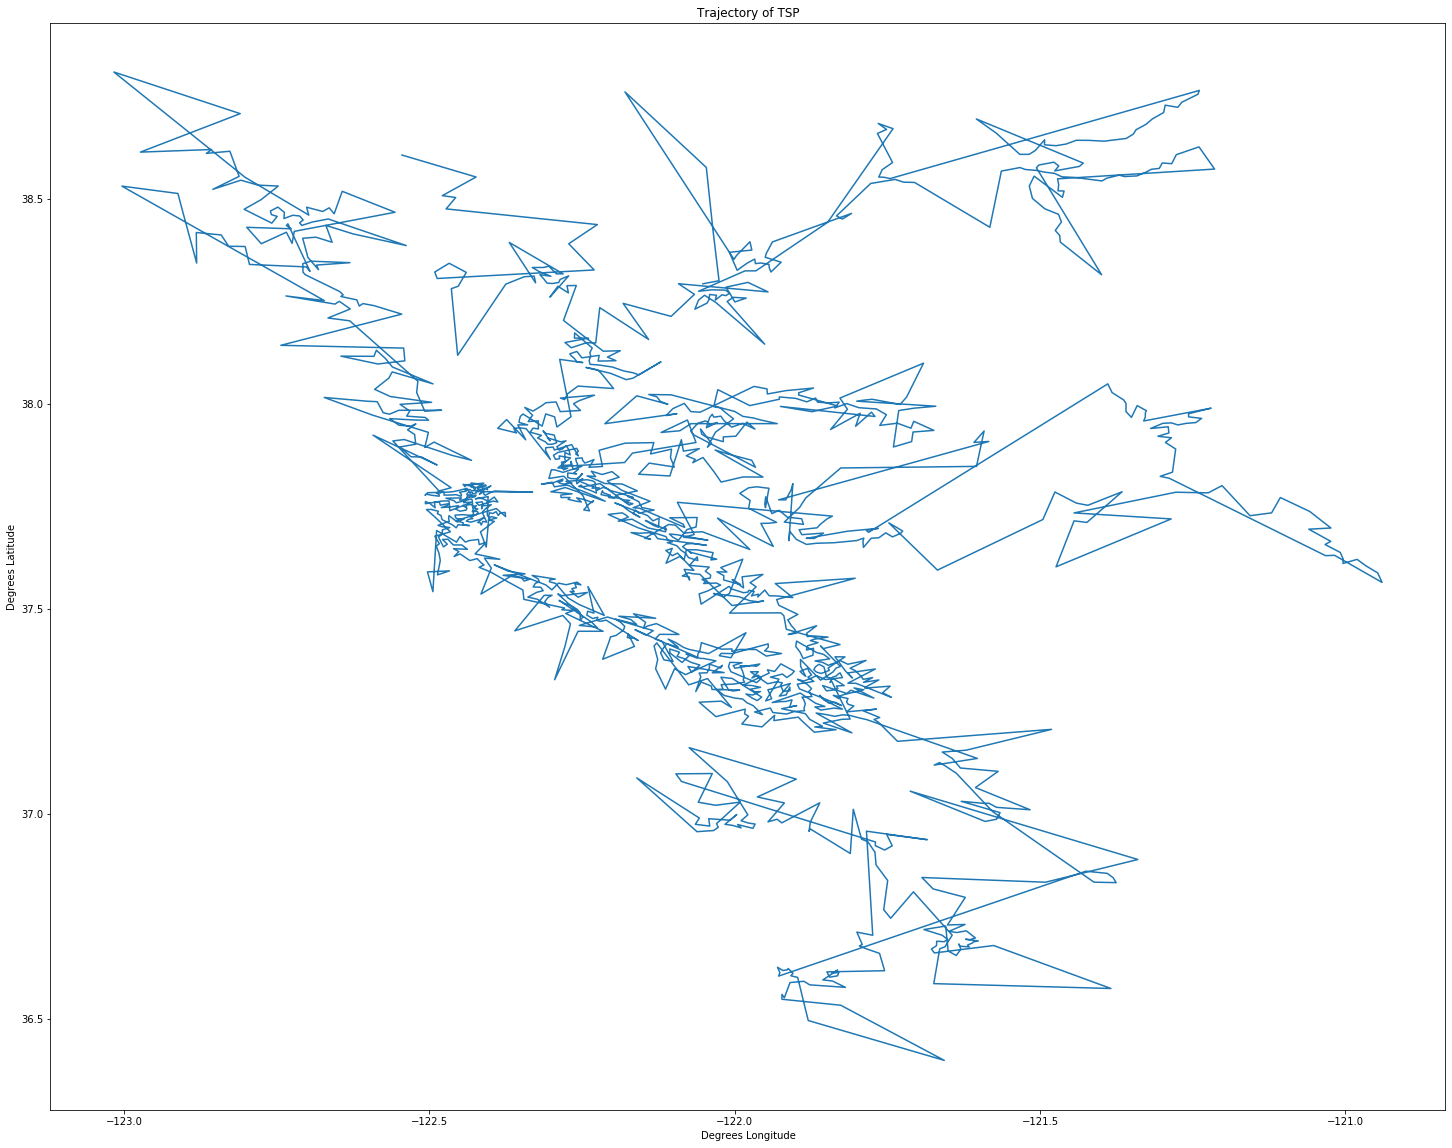

In [16]:
# QUESTION 10:
plt.figure(figsize=(25,20))

plt.plot(longitude, latitude)
plt.title('Trajectory of TSP')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.show()

In [17]:
# QUESTION 11: Plot the road mesh 

# Load the cleaned graph data in
uber_gcc = np.loadtxt(directory + '/uber_gcc.txt')
uber_gcc_graph = {}
for row in uber_gcc:
    location_index = tuple(np.sort(row[0:2]).astype('int'))
    uber_gcc_graph[location_index] = row[2]

In [18]:
uber_gcc_ids = np.concatenate([uber_gcc[:,0],uber_gcc[:,1]])
uber_gcc_ids = np.unique(uber_gcc_ids).astype('int')

mean_coords = np.zeros((len(uber_gcc_ids),2))
for n,location_key in enumerate(uber_gcc_ids):
    mean_coords[n,:] = location_dictionary[str(location_key)]['mean_coord']

In [19]:
tri = Delaunay(mean_coords)

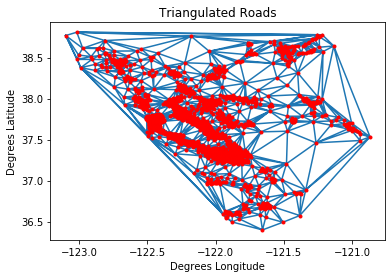

In [20]:
plt.triplot(mean_coords[:,0], mean_coords[:,1], tri.simplices.copy())
plt.plot(mean_coords[:,0], mean_coords[:,1],'r.')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Triangulated Roads')
plt.show()

In [21]:
# Question 13:

# Generate a new graph file that can be used in igraph to compute max flow

MILES_PER_DEGREE_LATLON = 69

def get_time(loc1,loc2,transit_time_graph):
    if (loc1,loc2) in transit_time_graph.keys():
        return transit_time_graph[(loc1,loc2)]
    else:
        return 0

# Calculate flow as #cars/hour
def get_flow(loc1, loc2, transit_time_graph,location_dict):
    coord1 = location_dict[str(loc1)]['mean_coord']
    coord2 = location_dict[str(loc2)]['mean_coord']
    distance_miles = MILES_PER_DEGREE_LATLON * np.sqrt(np.sum(np.square(coord2-coord1)))
    if (loc1,loc2) in transit_time_graph.keys():
        travel_time_hours = transit_time_graph[(loc1,loc2)] / 3600
        speed_mph = distance_miles / travel_time_hours
        flow = (2*speed_mph) / (0.003 + (speed_mph/1800))
        return flow
    else:
        return 0


def add_triangulated_edge(graph, triangle):
    edge12 = tuple(np.sort(triangle[:2]))
    edge13 = tuple(np.sort(triangle[0::2]))
    edge23 = tuple(np.sort(triangle[1:]))   

    flow12 = get_flow(edge12[0],edge12[1],uber_gcc_graph,location_dictionary)
    flow13 = get_flow(edge13[0],edge13[1],uber_gcc_graph,location_dictionary)
    flow23 = get_flow(edge23[0],edge23[1],uber_gcc_graph,location_dictionary)
    if edge12 not in graph.keys() and flow12 > 0:
        graph[edge12] = flow12
    if edge13 not in graph.keys() and flow13 > 0:
        graph[edge13] = flow13
    if edge23 not in graph.keys() and flow23 > 0:
        graph[edge23] = flow23

def add_travel_time_edge(graph,triangle,thresh):
    edge12 = tuple(np.sort(triangle[:2]))
    edge13 = tuple(np.sort(triangle[0::2]))
    edge23 = tuple(np.sort(triangle[1:]))   
    
    time12 = get_time(edge12[0],edge12[1],uber_gcc_graph)
    time13 = get_time(edge13[0],edge13[1],uber_gcc_graph)
    time23 = get_time(edge23[0],edge23[1],uber_gcc_graph)
    
    if edge12 not in graph.keys() and time12 < thresh and time12 > 0:
        graph[edge12] = time12
    if edge13 not in graph.keys() and time13 < thresh and time13 > 0:
        graph[edge13] = time13
    if edge23 not in graph.keys() and time23 < thresh and time23 > 0:
        graph[edge23] = time23

In [22]:
triangulated_graph = {}

for triangle_idx in tri.simplices:
    triangle = [uber_gcc_ids[triangle_idx[0]], uber_gcc_ids[triangle_idx[1]], uber_gcc_ids[triangle_idx[2]]]
    add_triangulated_edge(triangulated_graph,triangle)

In [23]:
# Write out a txt file with triangulated data
# This will be used in R's igraph library to do graph analysis
with open(directory + '/triangulated_graph.txt','w') as f:
    for locations in triangulated_graph:
        string = '{} {} {:.2f}\n'.format(int(locations[0]),int(locations[1]),triangulated_graph[locations])
        f.write(string)

In [24]:
# Locate the IDs for Stanford and UCSC
for i in location_dictionary.keys():
    if location_dictionary[i]['display_name'] == '100 Campus Drive, Stanford':
        print("Stanford ID = " + str(i) + ", " + str(location_dictionary[i]['mean_coord']))
    if location_dictionary[i]['display_name'] == '700 Meder Street, Santa Cruz':
        print("UCSC ID = " + str(i) + ", " + str(location_dictionary[i]['mean_coord']))
    # SF ID = 46
#     Oakland ID = 9
# Hayward = 108
# # Foster City = 974
#     if 'Foster City' in location_dictionary[i]['display_name']:
#         print(location_dictionary[i]['display_name']+ " ID = " + str(i) + ", " + str(location_dictionary[i]['mean_coord']))
#     if 'Hayward' in location_dictionary[i]['display_name']:
#         print(location_dictionary[i]['display_name']+ " ID = " + str(i) + ", " + str(location_dictionary[i]['mean_coord']))

UCSC ID = 1968, [-122.06456181   36.97416881]
Stanford ID = 2607, [-122.17598222   37.42968589]


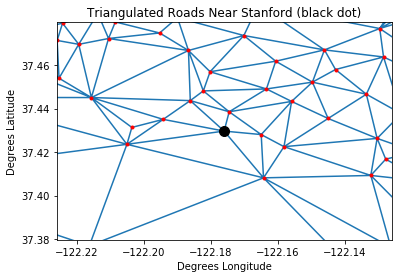

In [25]:
# Q13 
stanford_coords = location_dictionary['2607']['mean_coord']
plt.triplot(mean_coords[:,0], mean_coords[:,1], tri.simplices.copy())
plt.plot(mean_coords[:,0], mean_coords[:,1],'r.')
plt.plot(stanford_coords[0],stanford_coords[1],'k.',ms=20)
plt.xlim((stanford_coords[0]-0.05,stanford_coords[0]+0.05))
plt.ylim((stanford_coords[1]-0.05,stanford_coords[1]+0.05))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Triangulated Roads Near Stanford (black dot)')
plt.show()

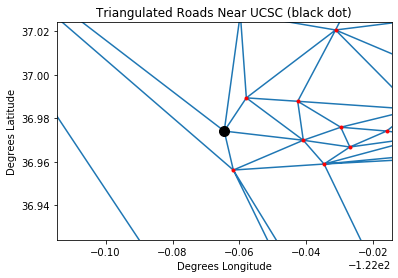

In [26]:
#Q13 Continued
ucsc_coords = location_dictionary['1968']['mean_coord']
plt.triplot(mean_coords[:,0], mean_coords[:,1], tri.simplices.copy())
plt.plot(mean_coords[:,0], mean_coords[:,1],'r.')
plt.plot(ucsc_coords[0],ucsc_coords[1],'k.',ms=20)
plt.xlim((ucsc_coords[0]-0.05,ucsc_coords[0]+0.05))
plt.ylim((ucsc_coords[1]-0.05,ucsc_coords[1]+0.05))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Triangulated Roads Near UCSC (black dot)')
plt.show()

In [27]:
#Q14 Prune the graph
triangulated_time_graph = {}
THRESH = 60*12

for triangle_idx in tri.simplices:
    triangle = [uber_gcc_ids[triangle_idx[0]], uber_gcc_ids[triangle_idx[1]], uber_gcc_ids[triangle_idx[2]]]
    add_travel_time_edge(triangulated_time_graph, triangle, THRESH)
    
len(triangulated_time_graph)

5074

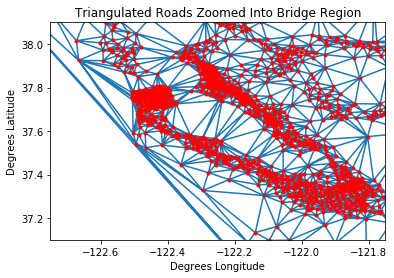

In [28]:
#Q14 Plot the original region near the bay
plt.triplot(mean_coords[:,0], mean_coords[:,1], tri.simplices.copy())
plt.plot(mean_coords[:,0], mean_coords[:,1],'r.')
plt.ylim((37.6-0.5,37.6+0.5))
plt.xlim((-122.25-0.5,-122.25+0.5))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Triangulated Roads Zoomed Into Bridge Region')
plt.show()

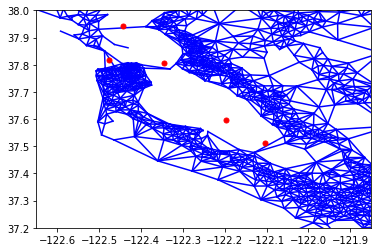

In [29]:
#Q15 Plot the pruned graph

plt.figure()
counter = 0
for edges in triangulated_time_graph.keys():
    coords1 = location_dictionary[str(edges[0])]['mean_coord']
    coords2 = location_dictionary[str(edges[1])]['mean_coord']
    plt.plot([coords1[0],coords2[0]],[coords1[1],coords2[1]],color='b')
plt.ylim((37.6-0.4,37.6+0.4))
plt.xlim((-122.25-0.4,-122.25+0.4))

bridge1 = [(-122.475+-122.479)/2, (37.806+37.83)/2]
bridge2 = [(-122.501+-122.387)/2, (37.956+37.93)/2]
bridge3 = [(-122.273+-122.122)/2, (37.563+37.627)/2]
bridge4 = [(-122.142+-122.067)/2, (37.486+37.54)/2]
bridge5 = [(-122.388+-122.302)/2, (37.788+37.825)/2]

bridges = np.array([bridge1,bridge2,bridge3,bridge4,bridge5])
plt.plot(bridges[:,0],bridges[:,1],'r.',ms=10)
plt.show()

In [30]:
#Q15 - Generate the pruned graph as a text file to be read into R
with open(directory + '/pruned_triangulated_graph.txt','w') as f:
    for loc_pairs in triangulated_time_graph.keys():
        flow = get_flow(loc_pairs[0],loc_pairs[1], uber_gcc_graph, location_dictionary)
        if flow > 0:
            string = '{} {} {:.2f}\n'.format(int(loc_pairs[0]),int(loc_pairs[1]),flow)
            f.write(string)

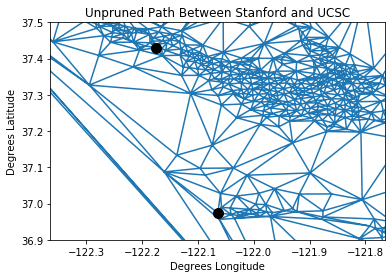

In [31]:
#Q15 Continued
stanford_coords = location_dictionary['2607']['mean_coord']
ucsc_coords = location_dictionary['1968']['mean_coord']
plt.triplot(mean_coords[:,0], mean_coords[:,1], tri.simplices.copy())
plt.plot(ucsc_coords[0],ucsc_coords[1],'k.',ms=20)
plt.plot(stanford_coords[0],stanford_coords[1],'k.',ms=20)
plt.xlim((ucsc_coords[0]-0.3,ucsc_coords[0]+0.3))
plt.ylim((37.2-0.3,37.2+0.3))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Unpruned Path Between Stanford and UCSC')
plt.show()

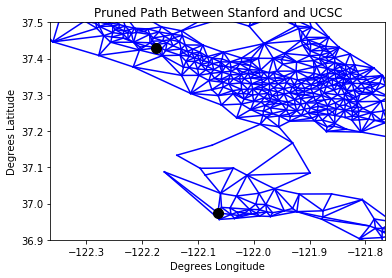

In [32]:
#Q15 Continued
stanford_coords = location_dictionary['2607']['mean_coord']
ucsc_coords = location_dictionary['1968']['mean_coord']
for edges in triangulated_time_graph.keys():
    coords1 = location_dictionary[str(edges[0])]['mean_coord']
    coords2 = location_dictionary[str(edges[1])]['mean_coord']
    plt.plot([coords1[0],coords2[0]],[coords1[1],coords2[1]],color='b')
plt.plot(ucsc_coords[0],ucsc_coords[1],'k.',ms=20)
plt.plot(stanford_coords[0],stanford_coords[1],'k.',ms=20)
plt.xlim((ucsc_coords[0]-0.3,ucsc_coords[0]+0.3))
plt.ylim((37.2-0.3,37.2+0.3))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Pruned Path Between Stanford and UCSC')
plt.show()

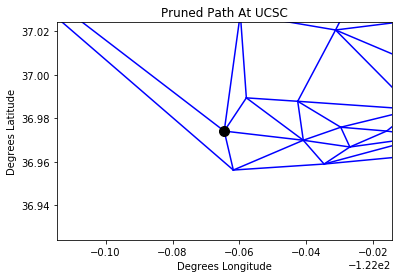

In [33]:
#Q15 Continued
stanford_coords = location_dictionary['2607']['mean_coord']
ucsc_coords = location_dictionary['1968']['mean_coord']
for edges in triangulated_time_graph.keys():
    coords1 = location_dictionary[str(edges[0])]['mean_coord']
    coords2 = location_dictionary[str(edges[1])]['mean_coord']
    plt.plot([coords1[0],coords2[0]],[coords1[1],coords2[1]],color='b')
plt.plot(ucsc_coords[0],ucsc_coords[1],'k.',ms=20)
plt.xlim((ucsc_coords[0]-0.05,ucsc_coords[0]+0.05))
plt.ylim((ucsc_coords[1]-0.05,ucsc_coords[1]+0.05))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Pruned Path At UCSC')
plt.show()

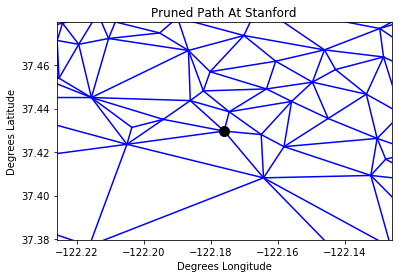

In [34]:
#Q15 Continued
stanford_coords = location_dictionary['2607']['mean_coord']
ucsc_coords = location_dictionary['1968']['mean_coord']
for edges in triangulated_time_graph.keys():
    coords1 = location_dictionary[str(edges[0])]['mean_coord']
    coords2 = location_dictionary[str(edges[1])]['mean_coord']
    plt.plot([coords1[0],coords2[0]],[coords1[1],coords2[1]],color='b')
plt.plot(stanford_coords[0],stanford_coords[1],'k.',ms=20)
plt.xlim((stanford_coords[0]-0.05,stanford_coords[0]+0.05))
plt.ylim((stanford_coords[1]-0.05,stanford_coords[1]+0.05))
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.title('Pruned Path At Stanford')
plt.show()